[View in Colaboratory](https://colab.research.google.com/github/takesi0627/deeplearningclass/blob/master/Machine_Learning_Intermediate_report.ipynb)

In [0]:
# Toy Dataset
import numpy
from matplotlib import pyplot
import sys

numpy.random.seed()
N = 40
d = 2
omega = numpy.random.randn(1, 1)
X = numpy.random.randn(N, d)
Y = numpy.array([1 if (omega * x + y + 0.8 * numpy.random.randn(1,1) > 0) else - 1 for x, y in X])

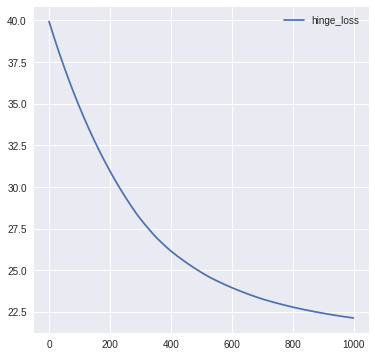

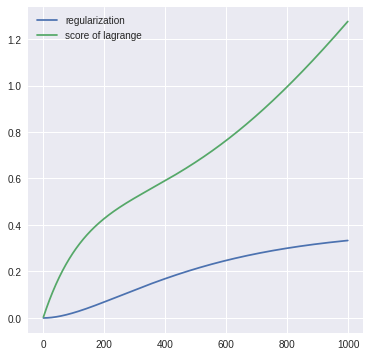

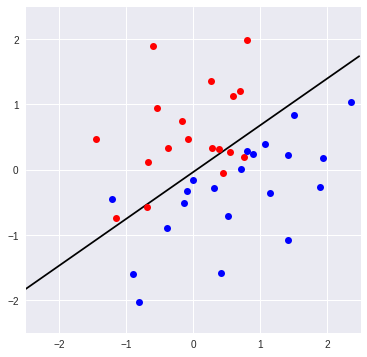

In [37]:
# Problem 3.3
alpha = numpy.zeros(N)
eta_al = 0.0001 # update ratio of alpha
itr = 1000
LAMBDA = 0.5

hinges = numpy.zeros(itr)
lagrange_score = numpy.zeros(itr)
regularization = numpy.zeros(itr)

for _itr in range(itr):
    for i in range(N):
        delta = 1 - (Y[i] * X[i]).dot(alpha * Y * X.T).sum() * 1 / 2 / LAMBDA
        alpha[i] = alpha[i] + eta_al * delta
#             alpha[i] = max(0, min(1, alpha[i] + eta_al * delta))

    w = (alpha * Y).T.dot(X) * 1 / 2 / LAMBDA

    loss = 0
    for i in range(N):
        loss += max(0, 1 - Y[i] * w.T.dot(X[i]))
    hinges[_itr] = loss
    regularization[_itr] = LAMBDA * w.T.dot(w)

    score = 0
    for i in range(N):
      for j in range(N):
        score += alpha[i] * alpha[j] * Y[i] * Y[j] * X[i].T.dot(X[j])

    score *= -1 / 4 / LAMBDA
    score += alpha.sum()
    lagrange_score[_itr] = score

pyplot.figure(figsize = (6, 6))
pyplot.plot(numpy.arange(0, itr, 1), hinges, label='hinge_loss')
pyplot.legend()
pyplot.show()

pyplot.figure(figsize = (6, 6))
pyplot.plot(numpy.arange(0, itr, 1), regularization, label='regularization')
pyplot.plot(numpy.arange(0, itr, 1), lagrange_score, label='score of lagrange')
pyplot.legend()
pyplot.show()    

index = alpha > 0
w = (alpha * Y).T.dot(X) * 1 / 2 / LAMBDA
b = (Y[index] - X[index].dot(w)).mean()

seq = numpy.arange(-2.5, 2.5, 0.02)
pyplot.figure(figsize = (6, 6))
pyplot.xlim(-2.5, 2.5)
pyplot.ylim(-2.5, 2.5)
pyplot.plot(seq, -(w[0] * seq + b) / w[1], 'k-')
pyplot.plot(X[Y ==  1,0], X[Y ==  1,1], 'ro')
pyplot.plot(X[Y == -1,0], X[Y == -1,1], 'bo')
pyplot.show()



In [0]:
# Problem 6.3

